In [1]:
import sys
sys.path.append('..')
from viz.shot_xg import plot_shot_xg
from viz.shot_map_report import plot_shot_report
import pandas as pd


In [2]:
EVENTS_CSV = '../data/match_events.csv'
HOME_LOGO = '../../blog/logos/LaLiga/Athletic Bilbao.png'  
AWAY_LOGO = '../../blog/logos/LaLiga/FC Barcelona.png'
LEAGUE_LOGO = '../../blog/logos/LaLiga/la-liga.png'

In [3]:
def create_shots_csv(events_csv_path, output_path='shots_temp.csv'):
    """
    Crear CSV de disparos con formato correcto para shot_xg_viz
    """
    # Leer eventos
    events = pd.read_csv(events_csv_path)
    
    # Filtrar solo disparos/goles
    shots = events[events['event_type'].str.contains('Shot|Goal', na=False)].copy()
    
    # CORRECCIÓN: Crear is_goal desde el campo 'type'
    shots['is_goal'] = shots['type'] == 'Goal'
    
    # Detectar cabezazos desde qualifiers
    shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})
    
    # Asegurar que xG existe y es numérico
    if 'xg' not in shots.columns:
        shots['xg'] = 0.0
    else:
        shots['xg'] = pd.to_numeric(shots['xg'], errors='coerce').fillna(0.0)
    
    # Campos importantes para el viz
    required_cols = ['game_id', 'period', 'minute', 'type', 'team', 'player', 
                    'x', 'y', 'xg', 'is_goal', 'body_part']
    
    # Verificar que todos existan
    for col in required_cols:
        if col not in shots.columns:
            print(f"Advertencia: falta columna {col}")
    
    # Guardar
    shots.to_csv(output_path, index=False)
    
    # Mostrar resumen
    print(f"Total disparos: {len(shots)}")
    print(f"Goles detectados: {shots['is_goal'].sum()}")
    print(f"xG total: {shots['xg'].sum():.2f}")
    print(f"Equipos: {shots['team'].unique()}")
    
    return shots

In [4]:
shots = create_shots_csv(EVENTS_CSV, 'shots_temp.csv')
shots.head()

goles = shots[shots['is_goal'] == True]
print(f"\nGoles encontrados: {len(goles)}")
goles[['minute', 'player', 'team', 'xg', 'body_part']]

Total disparos: 22
Goles detectados: 3
xG total: 4.13
Equipos: ['Athletic Club' 'Barcelona']

Goles encontrados: 3


,minute,player,team,xg,body_part
263,13.0,Robert Lewandowski,Barcelona,0.349111,Foot
308,17.0,Robert Lewandowski,Barcelona,0.853691,Head
1807,93.0,Dani Olmo,Barcelona,0.743278,Foot


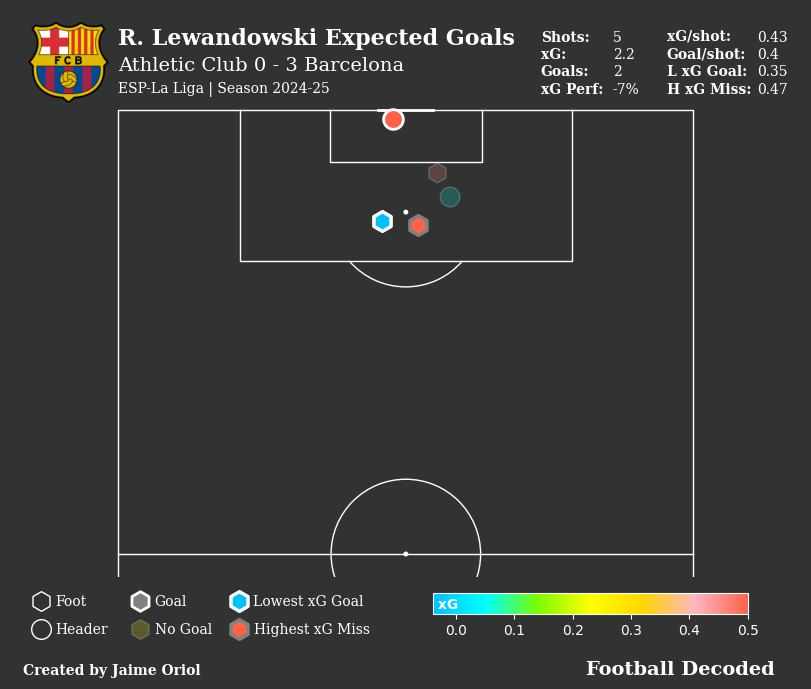

In [5]:
fig = plot_shot_xg(
    csv_path='shots_temp.csv',
    filter_by='Robert Lewandowski',
    logo_path=AWAY_LOGO,  # Logo del Barça para Lewandowski
    title_text='R. Lewandowski Expected Goals',
    subtitle_text='Athletic Club 0 - 3 Barcelona',
    subsubtitle_text='ESP-La Liga | Season 2024-25'
)

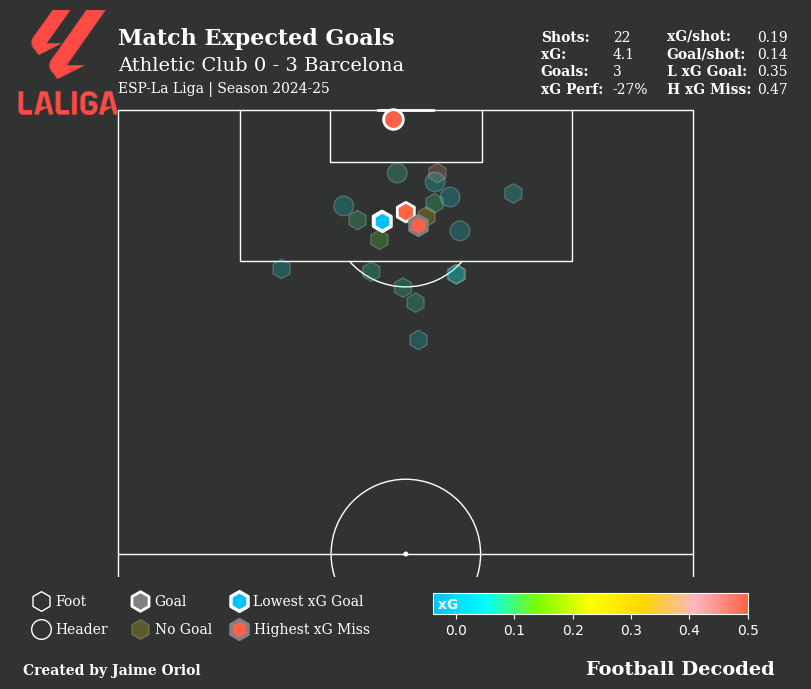

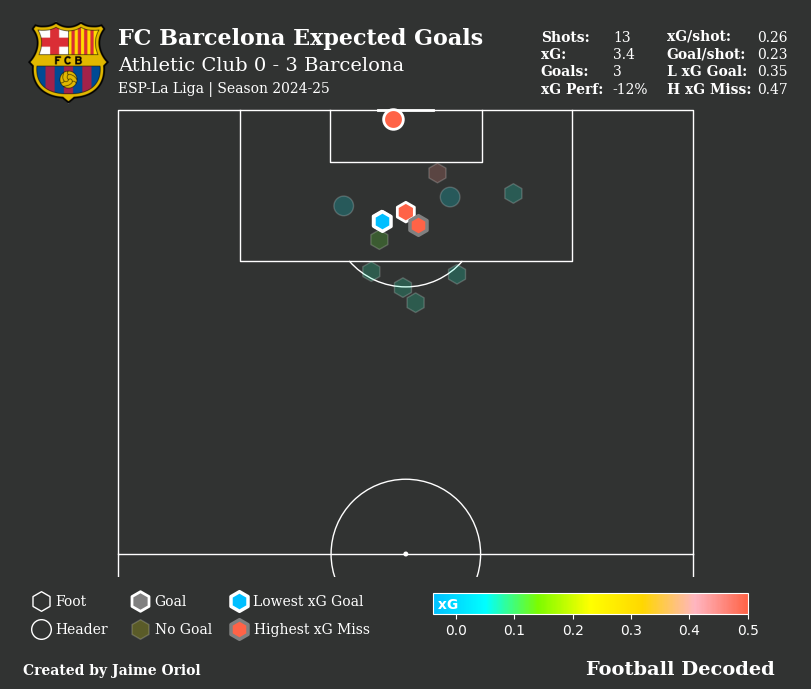

In [6]:
fig_all = plot_shot_xg(
    csv_path='shots_temp.csv',
    filter_by='all',
    logo_path=LEAGUE_LOGO,  # Sin logo o puedes poner logo de LaLiga
    title_text='Match Expected Goals',
    subtitle_text='Athletic Club 0 - 3 Barcelona',
    subsubtitle_text='ESP-La Liga | Season 2024-25'
)

# Para un equipo
fig_team = plot_shot_xg(
    csv_path='shots_temp.csv',
    filter_by='Barcelona',
    logo_path=AWAY_LOGO,
    title_text='FC Barcelona Expected Goals',
    subtitle_text='Athletic Club 0 - 3 Barcelona',
    subsubtitle_text='ESP-La Liga | Season 2024-25'
)

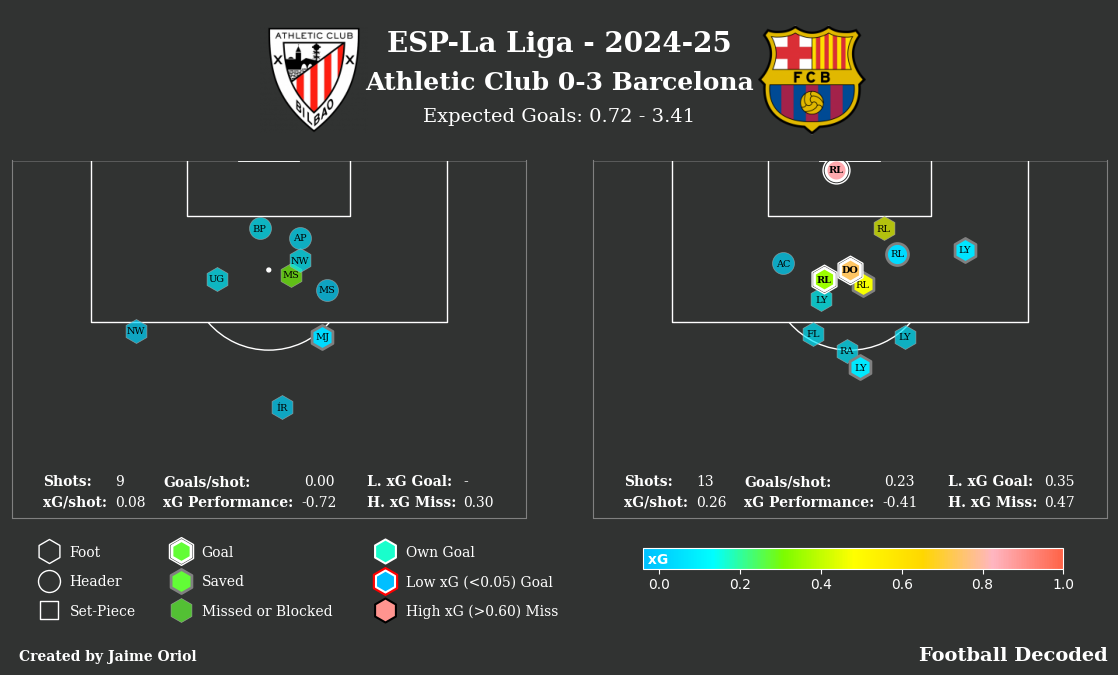

In [7]:
fig_report = plot_shot_report(
    csv_path='shots_temp.csv',
    home_logo_path=HOME_LOGO,
    away_logo_path=AWAY_LOGO,
    season='2024-25'
)